## **Nhập các thư viện cần thiết**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats
import matplotlib.patches as patches

## **Nhập dữ liệu**

In [2]:
csv_files = glob.glob('Processed Data/*.csv')

# Initialize an empty list to hold DataFrames
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# combine all dataframes into one
road_df = pd.concat(dfs, ignore_index=True)

### **Kiểm tra dữ liệu**

#### Loại bỏ các dòng trùng với nhau

In [3]:
# Check for duplicates
duplicate_count = road_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
road_df = road_df.drop_duplicates()

# Optionally, reset the index of the cleaned DataFrame
road_df.reset_index(drop=True, inplace=True)


Number of duplicate rows: 34154


#### Kiểm tra kiểu dữ liệu của từng cột

In [4]:
road_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469996 entries, 0 to 1469995
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1469996 non-null  object 
 1   Location_Easting_OSGR                        1469895 non-null  float64
 2   Location_Northing_OSGR                       1469996 non-null  float64
 3   Longitude                                    1469895 non-null  float64
 4   Latitude                                     1469996 non-null  float64
 5   Police_Force                                 1469996 non-null  int64  
 6   Accident_Severity                            1469996 non-null  int64  
 7   Number_of_Vehicles                           1469996 non-null  int64  
 8   Number_of_Casualties                         1469996 non-null  int64  
 9   Date                                         1

#### Tiến hành bỏ các cột có quá nhiều giá trị bị thiếu 

In [5]:
# Calculate the missing ratio for each column
missing_ratios = road_df.isnull().mean()
threshold = 0.5

# Drop columns with missing ratio above the threshold
columns_to_drop = missing_ratios[missing_ratios > threshold].index
road_df = road_df.drop(columns=columns_to_drop)

print(f"Columns dropped: {list(columns_to_drop)}")


Columns dropped: ['Special_Conditions_at_Site']


## **Đặt câu hỏi**

### **Câu hỏi 1**

So sánh tỷ lệ tai nạn nghiêm trọng giữa các khu vực có và không có các thiết bị an toàn 
(vạch qua đường, đèn tín hiệu, biển báo). Những loại thiết bị nào chứng minh được hiệu quả 
nhất trong việc giảm thiểu tai nạn nghiêm trọng? 

#### Lợi ích sau khi trả lời câu hỏi

- Giúp đánh giá được độ hiệu quả của các thiết bị an toàn.

- Hướng dẫn phân bổ nguồn lực để cải thiện an toàn giao thông.

- Xác định biện pháp an toàn có tác động nhất.

#### Các thuộc tính có liên quan

`Accident_Severity`: thước đo độ nghiêm trọng của tai nạn 

`Junction_Control`: biển báo và đèn tín hiệu giao thông

`Pedestrian_Crossing-Physical_Facilities`: sự xuất hiện của vạch kẻ đường

`Urban_or_Rural_Area`: khu vực nông thôn hay thành thị

`Number_of_Casualties`: số người thương vong


#### Hướng phân tích

- Phân tích dữ liệu ban đầu:
    - Tính toán tỉ lệ tai nạn nghiêm trọng có liên quan.
    - Tạo các hình ảnh trực quan.
    - Tiến hành đánh giá sơ bộ về sự hiện diện của thiết bị an toàn.

- Hiệu quả của thiết bị an toàn:
    - Nhóm và phân tích dữ liệu theo loại thiết bị an toàn (tín hiệu giao thông, giao cắt, biển báo)
    - Kiểm tra tỷ lệ nghiêm trọng bằng thử nghiệm thống kê để biết ý nghĩa
    - Đánh giá tác động đến số lượng thương vong và mức độ nghiêm trọng
    - Xem xét bối cảnh đô thị/nông thôn trong hiệu quả của thiết bị

- So sáng toàn diện:
    - Kết hợp các phân tích trên các biện pháp an toàn khác nhau.
    - Rút ra kết luận tích hợp về cơ sở hạ tầng an toàn tối ưu.

#### Tiến hành phân tích

Đầu tiên ta xem xét sự phân bố của độ nghiêm trọng trong các vụ tai nạn đối và các điều kiện cơ sở vật chất liên quan.

In [ ]:
urru  = road_df.groupby(['Urban_or_Rural_Area', 'Junction_Control'])

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Automatic traffic signal,-1,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Automatic traffic signal,5,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,Giveway or uncontrolled,-1,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,Giveway or uncontrolled,-1,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,Giveway or uncontrolled,-1,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,Giveway or uncontrolled,-1,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,Giveway or uncontrolled,6,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,Automatic traffic signal,-1,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Automatic traffic signal,4,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002900,2005
10,200501BS00012,526240.0,178900.0,-0.182872,51.494902,1,3,1,1,16/01/2005,...,Automatic traffic signal,4,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002835,2005


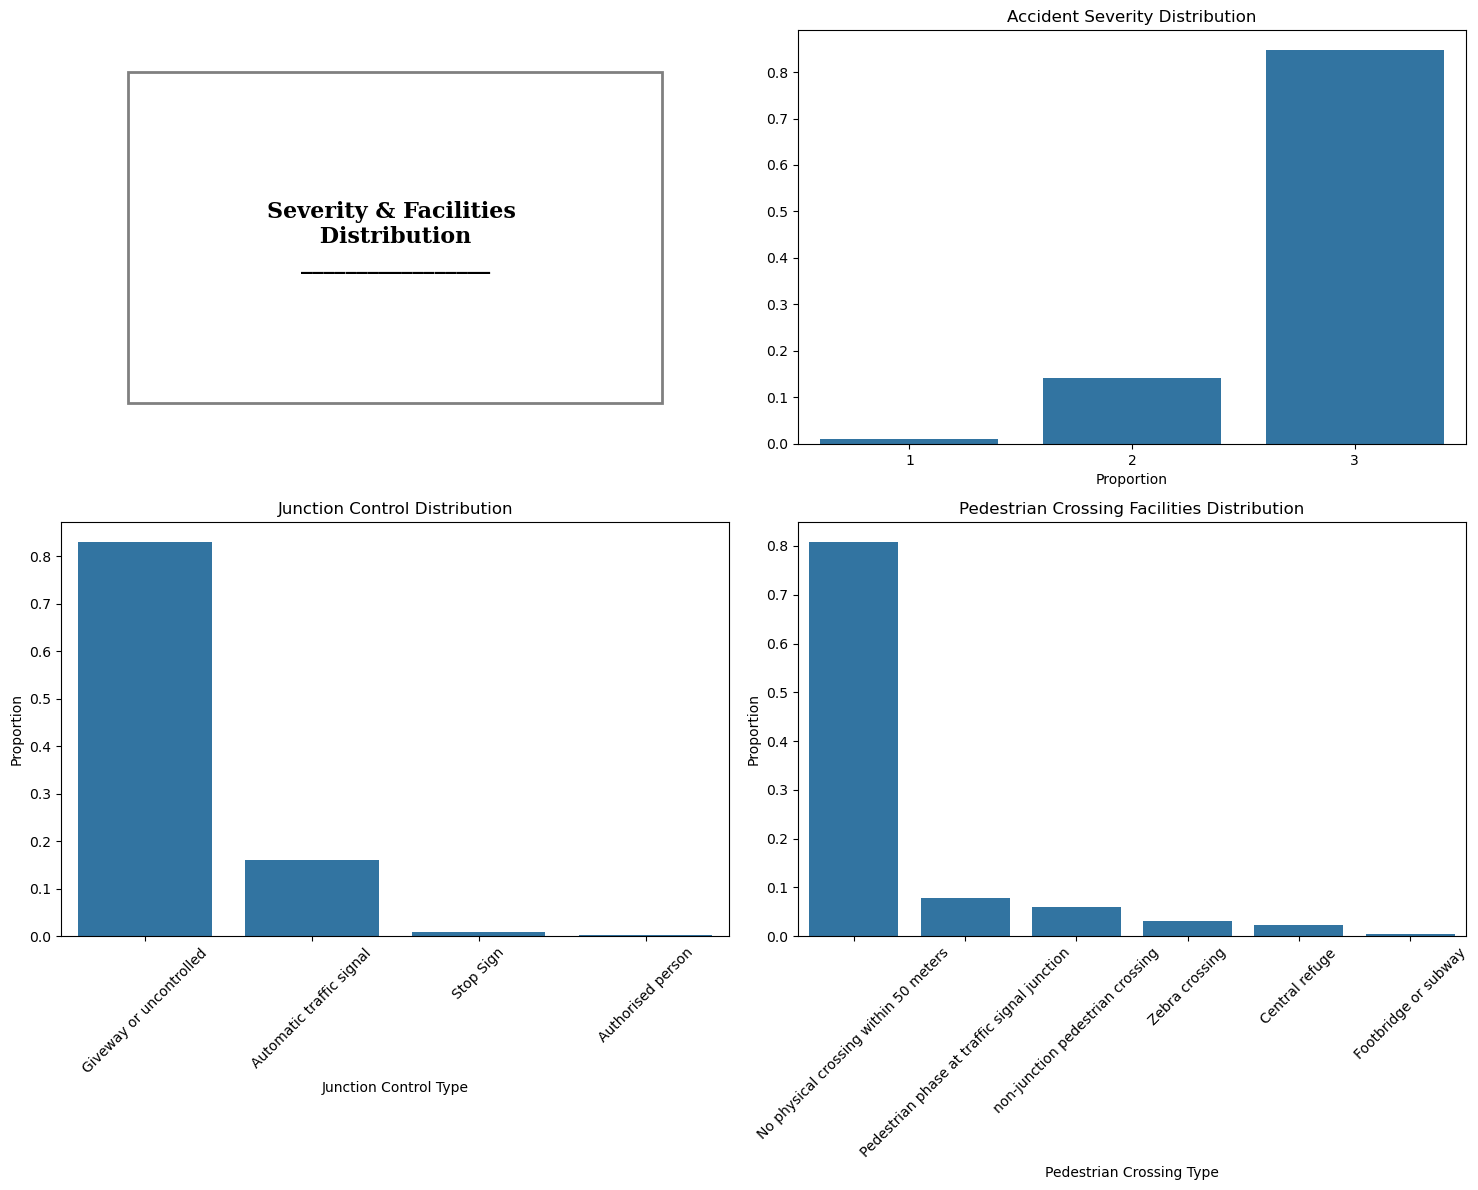

In [33]:
# overall severity distribution
severity_dist = df['Accident_Severity'].value_counts(normalize=True)

# # Safety equipment presence
junction_dist = df['Junction_Control'].value_counts(normalize=True)
crossing_dist = df['Pedestrian_Crossing-Physical_Facilities'].value_counts(normalize=True)

# Create figure with 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# First subplot (top-left) - Text box with decorative border
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Add rectangle border
rect = patches.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=2, edgecolor='gray', facecolor='none')
ax1.add_patch(rect)

# Add text
ax1.text(0.5, 0.5, 'Severity & Facilities \n Distribution \n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=16,
         fontweight='bold',
         fontfamily='serif',
         transform=ax1.transAxes)

# Second subplot (top-right) - Accident Severity
sns.barplot(x=severity_dist.index, y=severity_dist.values, ax=ax2)
ax2.set_title('Accident Severity Distribution')
ax2.set_xlabel('Severity')
ax2.set_xlabel('Proportion')
ax2.tick_params(axis='x')

# Third subplot (bottom-left) - Junction Control
sns.barplot(x=junction_dist.index, y=junction_dist.values, ax=ax3)
ax3.set_title('Junction Control Distribution')
ax3.set_xlabel('Junction Control Type')
ax3.set_ylabel('Proportion')
ax3.tick_params(axis='x', rotation=45)

# Fourth subplot (bottom-right) - Pedestrian Crossing
sns.barplot(x=crossing_dist.index, y=crossing_dist.values, ax=ax4)
ax4.set_title('Pedestrian Crossing Facilities Distribution')
ax4.set_xlabel('Pedestrian Crossing Type')
ax4.set_ylabel('Proportion')
ax4.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Nhận xét**

- Tỉ lệ tai nạn nghiêm trọng ở mức 3 chiếm phần lớn trong các trường hợp tai nạn.

- Ngoài ra ta còn hình dung được đa số các trường hợp tai nạn xảy ra tại các nơi không có vạch kẻ đường dành cho người đi bộ, không có các biển báo kiểm soát hoặc đèn tín hiệu,... điều này sẽ được làm rõ trong các phân tích tiếp theo


Phân tích độ hiệu quả của các thiết bị an toàn

In [45]:
# Calculate severity rates by equipment type
severity_by_junction = road_df.groupby(['Junction_Control', 'Accident_Severity']).size().unstack(fill_value=0)
severity_by_crossing = road_df.groupby(['Pedestrian_Crossing-Physical_Facilities', 'Accident_Severity']).size().unstack(fill_value=0)

# Convert to percentages
severity_by_junction_pct = severity_by_junction.div(severity_by_junction.sum(axis=1), axis=0) * 100
severity_by_crossing_pct = severity_by_crossing.div(severity_by_crossing.sum(axis=1), axis=0) * 100

print("\nSeverity Rates by Junction Control (%):")
print(severity_by_junction_pct)
print("\nSeverity Rates by Pedestrian Crossing (%):")
print(severity_by_crossing_pct)

# Calculate average casualties by equipment type
sum_casualties_junction = road_df.groupby('Junction_Control')['Number_of_Casualties'].sum()
sum_casualties_crossing = road_df.groupby('Pedestrian_Crossing-Physical_Facilities')['Number_of_Casualties'].sum()

print("\n Sum Casualties by Junction Control:")
print(sum_casualties_junction)
print("\n Sum Casualties by Pedestrian Crossing:")
print(sum_casualties_crossing)


Severity Rates by Junction Control (%):
Accident_Severity                1          2          3
Junction_Control                                        
Authorised person         1.137441  12.251185  86.611374
Automatic traffic signal  1.046473  12.181236  86.772291
Giveway or uncontrolled   1.341118  13.809573  84.849308
Stop Sign                 1.517385  12.691977  85.790638

Severity Rates by Pedestrian Crossing (%):
Accident_Severity                                   1          2          3
Pedestrian_Crossing-Physical_Facilities                                    
Central refuge                               1.463796  16.355036  82.181168
Footbridge or subway                         1.727402  12.186465  86.086133
No physical crossing within 50 meters        1.383227  13.603701  85.013073
Pedestrian phase at traffic signal junction  0.657590  11.691519  87.650891
Zebra crossing                               0.598326  12.433876  86.967798
non-junction pedestrian crossing         

Trực quan hóa để có cái nhìn tổng quan về kết quả phía trên

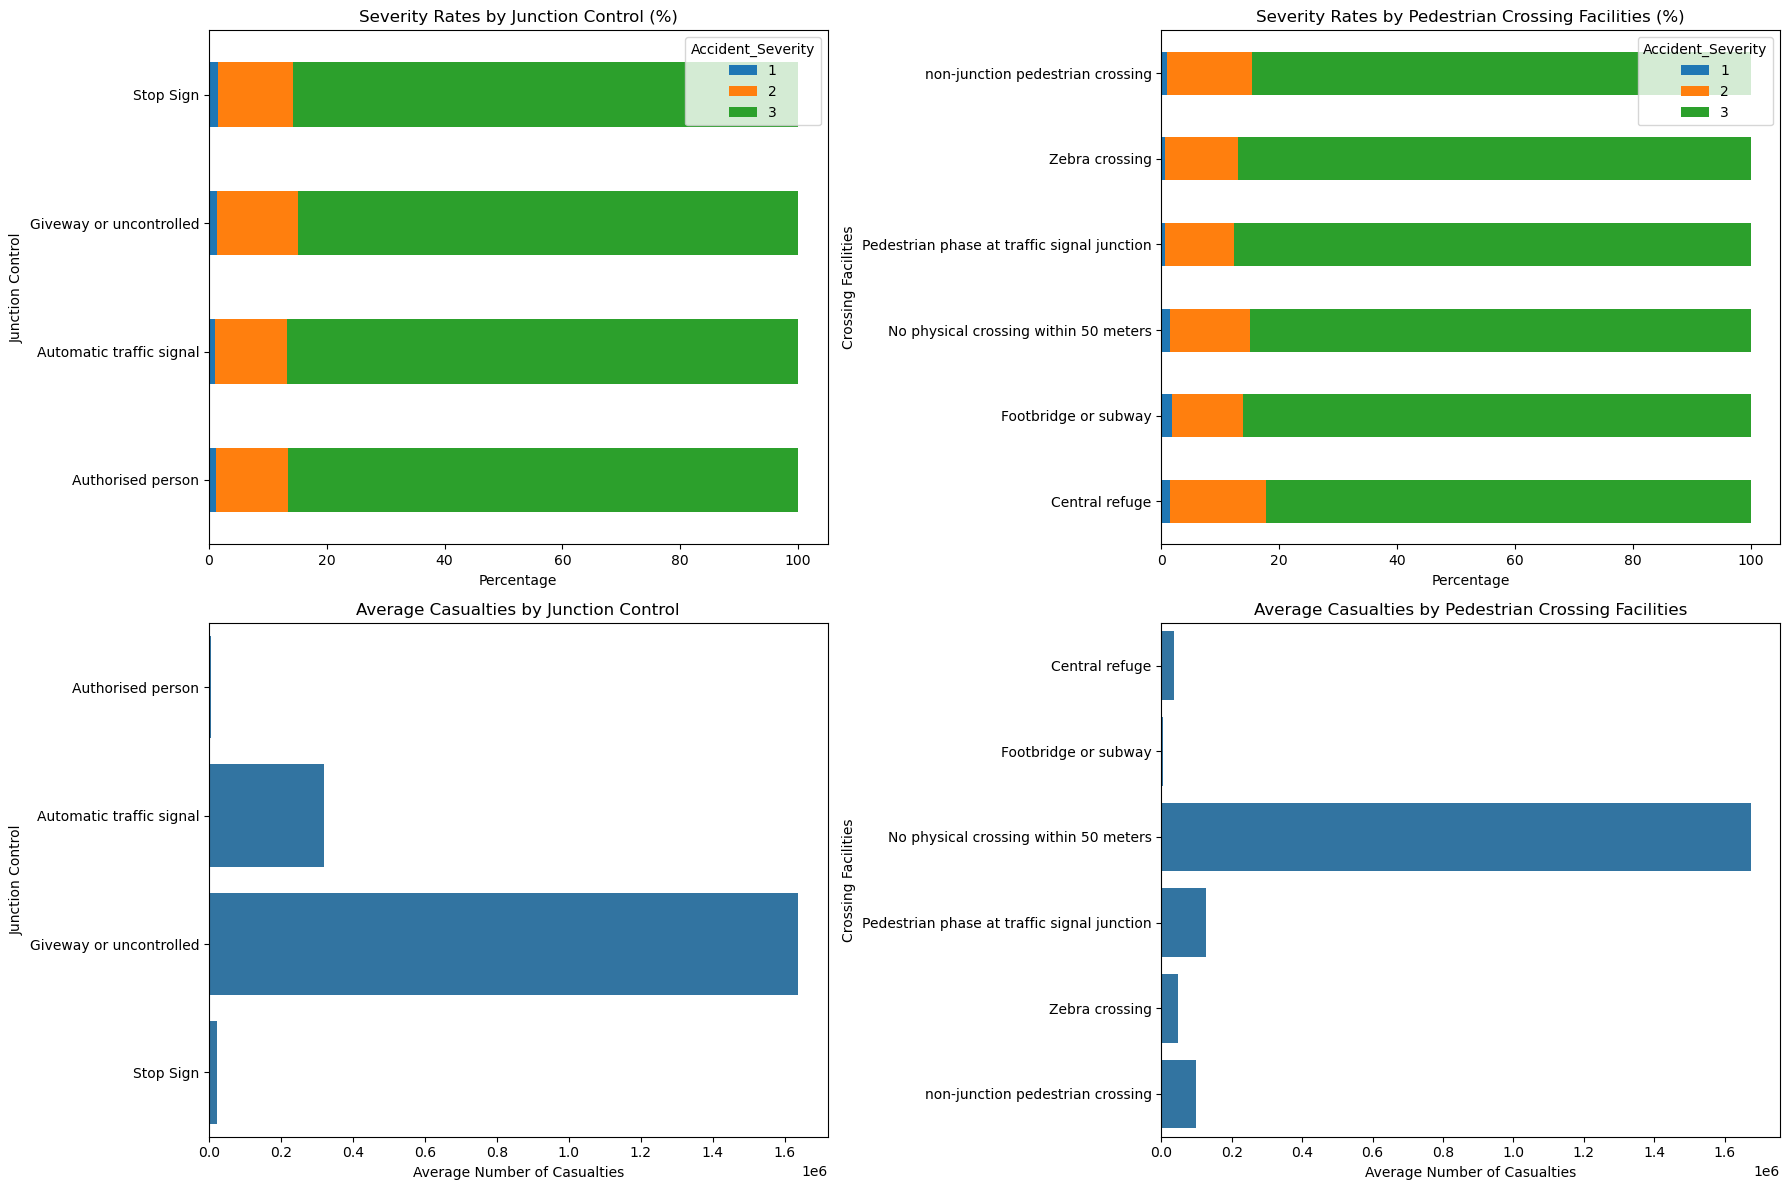

In [46]:
# Plot severity rates by Junction Control
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
severity_by_junction_pct.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Severity Rates by Junction Control (%)')
plt.xlabel('Percentage')
plt.ylabel('Junction Control')

# Plot severity rates by Pedestrian Crossing Facilities
plt.subplot(2, 2, 2)
severity_by_crossing_pct.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Severity Rates by Pedestrian Crossing Facilities (%)')
plt.xlabel('Percentage')
plt.ylabel('Crossing Facilities')

# Plot average casualties by Junction Control
plt.subplot(2, 2, 3)
sns.barplot(x=sum_casualties_junction.values, y=sum_casualties_junction.index, orient='h')
plt.title('Average Casualties by Junction Control')
plt.xlabel('Average Number of Casualties')
plt.ylabel('Junction Control')

# Plot average casualties by Pedestrian Crossing Facilities
plt.subplot(2, 2, 4)
sns.barplot(x=sum_casualties_crossing.values, y=sum_casualties_crossing.index, orient='h')
plt.title('Average Casualties by Pedestrian Crossing Facilities')
plt.xlabel('Average Number of Casualties')
plt.ylabel('Crossing Facilities')

plt.tight_layout()
plt.show()

**Nhận xét tổng quát**

- Tai nạn mức độ 3 chiếm trên 84% tổng số tai nạn ở mọi loại giao lộ và tiện nghi qua đường.

- Các giao lộ dừng xe và đèn tín hiệu dành cho người đi bộ có xu hướng có tỷ lệ tai nạn tử vong cao hơn một chút.

- Số lượng người thương vong ở các điểm không có các cơ sở vật chất đảm bảo an toàn như biển báo giao thông, đèn tín hiệu giao thông, vạch kẻ đường cho người đi bộ gấp nhiều lần so với các phần đường có các yếu tố an toàn này.

- Ngay cả các địa điểm có tiện nghi an toàn cao (như đèn tín hiệu) vẫn có tỷ lệ tai nạn ở mức 3 - mức cao nhất vẫn đáng báo động.

- Tỉ lệ tai nạn nghiêm trọng chiếm khoảng 85% trong tất cả các điều kiện có lẫn không có yếu tố thiết bị an toàn như vạch kẻ đường, biển báo giao thông hoặc đèn tín hiệu giao thông,... 

-> Điều này cho thấy mức độ nghiêm trọng của tai nạn không hề liên quan đến việc tồn tại hay không của các thiết bị an toàn, nhưng việc các phần đường không có các yếu tố an toàn này dẫn đến hậu quả xảy ra các vụ tai nạn thường xuyên hơn. Vì vậy việc chú trọng vào các yếu tố đảm bảo an toàn cho người tham gia giao thông là rất cần thiết trong việc giảm thiểu số lượng tai nạn.
